In [ ]:
import pandas as pd
data = pd.read_csv('data.csv')
# Printing the first 5 rows of the data to verify import
print(data.head())

                                    message  fingers tail  species
0                        pluvia arbor aquos        4   no   Aquari
1                 cosmix xeno nebuz odbitaz        5  yes  Zorblax
2        solarix glixx novum galaxum quasar        5  yes  Zorblax
3  arbor insectus pesros ekos dootix nimbus        2  yes  Florian
4         mermax drakos lorix epikoz deftax        4   no   Faerix


In [ ]:
# Adding new columns 'num_characters', 'num_words' with the number of characters in the 'message' column
data['num_characters'] = data['message'].str.len()
data['num_words'] = data['message'].str.split().str.len()

print(data.head())


                                    message  fingers tail  species  \
0                        pluvia arbor aquos        4   no   Aquari   
1                 cosmix xeno nebuz odbitaz        5  yes  Zorblax   
2        solarix glixx novum galaxum quasar        5  yes  Zorblax   
3  arbor insectus pesros ekos dootix nimbus        2  yes  Florian   
4         mermax drakos lorix epikoz deftax        4   no   Faerix   

   num_characters  num_words  
0              18          3  
1              25          4  
2              34          5  
3              40          6  
4              33          5  


In [ ]:
# Convert 'tail' column to 1 if 'yes', otherwise 0
data['tail'] = data['tail'].apply(lambda x: 1 if x == 'yes' else 0)
print(data.head())


                                    message  fingers  tail  species  \
0                        pluvia arbor aquos        4     0   Aquari   
1                 cosmix xeno nebuz odbitaz        5     1  Zorblax   
2        solarix glixx novum galaxum quasar        5     1  Zorblax   
3  arbor insectus pesros ekos dootix nimbus        2     1  Florian   
4         mermax drakos lorix epikoz deftax        4     0   Faerix   

   num_characters  num_words  
0              18          3  
1              25          4  
2              34          5  
3              40          6  
4              33          5  


In [ ]:
# Group by 'species' and calculate the mean of 'num_words' for each group
average_words_by_species = data.groupby('species')['num_words'].mean()
print(average_words_by_species)
# Group by 'species' and calculate the mean of 'num_fingers' for each group
average_fingers_by_species = data.groupby('species')['fingers'].mean()
print(average_fingers_by_species)

species
Aquari      5.395833
Cybex       5.400000
Emotivor    5.462963
Faerix      5.558140
Florian     5.115385
Mythron     5.540000
Nexoon      5.162791
Quixnar     5.400000
Sentire     5.727273
Zorblax     5.647059
Name: num_words, dtype: float64


In [ ]:
def rabin_karp(text, pattern):
  """
  Rabin-Karp rolling hash implementation.

  Args:
    text: The text to search within.
    pattern: The pattern to search for.

  Returns:
    A list of indices where the pattern is found in the text.
  """
  n = len(text)
  m = len(pattern)
  if m > n:
    return []

  # Precompute hash values for pattern and initial window of text
  pattern_hash = hash(pattern)
  window_hash = hash(text[:m])

  indices = []
  for i in range(n - m + 1):
    if pattern_hash == window_hash:
      if text[i:i + m] == pattern:
        indices.append(i)

    if i < n - m:
      # Rolling hash calculation
      window_hash = hash(text[i + 1:i + m + 1])

  return indices

# Calculate the Rabin-Karp hash of each message
data['rabin_karp_hash'] = data['message'].apply(lambda x: hash(x) if isinstance(x, str) else None)
print(data.head())


                                    message  fingers  tail  species  \
0                        pluvia arbor aquos        4     0   Aquari   
1                 cosmix xeno nebuz odbitaz        5     1  Zorblax   
2        solarix glixx novum galaxum quasar        5     1  Zorblax   
3  arbor insectus pesros ekos dootix nimbus        2     1  Florian   
4         mermax drakos lorix epikoz deftax        4     0   Faerix   

   num_characters  num_words      rabin_karp_hash  
0              18          3 -5949042726681104978  
1              25          4 -7310603736316695379  
2              34          5  2715490893770488166  
3              40          6 -7580060495572011363  
4              33          5 -4288299550352614427  


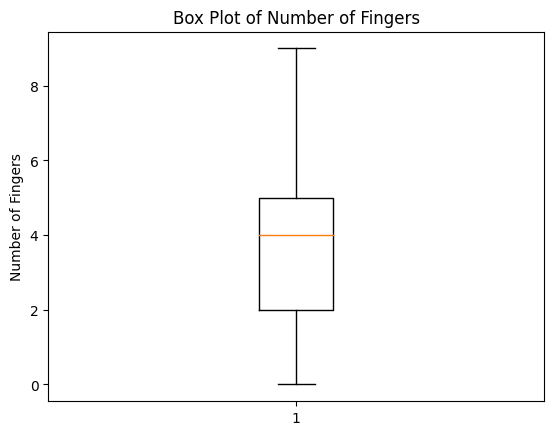

In [ ]:
# box plot for number of fingers
import matplotlib.pyplot as plt

plt.boxplot(data['fingers'])
plt.title('Box Plot of Number of Fingers')
plt.ylabel('Number of Fingers')
plt.show()


In [ ]:
def sum_ascii_values(text):
  """Calculates the sum of ASCII values for characters in a string."""
  total_ascii = 0
  for char in text:
    total_ascii += ord(char)
  return total_ascii

# Adding a new 'ascii_sum' column to the data indicating the sum of ASCII values for characters in 'message'
data['ascii_sum'] = data['message'].apply(sum_ascii_values)
print(data.head())

# Group by 'species' and calculate the mean of 'ascii_sum' for each group
average_ascii_sum_by_species = data.groupby('species')['ascii_sum'].mean()
print(average_ascii_sum_by_species)

                                    message  fingers  tail  species  \
0                        pluvia arbor aquos        4     0   Aquari   
1                 cosmix xeno nebuz odbitaz        5     1  Zorblax   
2        solarix glixx novum galaxum quasar        5     1  Zorblax   
3  arbor insectus pesros ekos dootix nimbus        2     1  Florian   
4         mermax drakos lorix epikoz deftax        4     0   Faerix   

   num_characters  num_words      rabin_karp_hash  ascii_sum  
0              18          3 -5949042726681104978       1808  
1              25          4 -7310603736316695379       2494  
2              34          5  2715490893770488166       3423  
3              40          6 -7580060495572011363       3991  
4              33          5 -4288299550352614427       3274  


In [ ]:
# Store Quixnar data in new variable
quixnar_data = data[data['species'] == 'Quixnar']
print(quixnar_data.head())

                                             message  fingers  tail  species  \
21           xeno stardux novtm xeno kometa celestar        4     0  Quixnar   
26  celestar orbitaz lunox nebuz blaloz ufox solarix        4     0  Quixnar   
27              nebulax galaxum quasar celestar ufox        4     0  Quixnar   
50              meteorn quasar solarix novax solarih        4     0  Quixnar   
58              novara celestar solarix zorp solarix        3     0  Quixnar   

    num_characters  num_words      rabin_karp_hash  ascii_sum  
21              39          6  1049577348800642558       3879  
26              48          7  5639177661791525428       4784  
27              36          5  6428859542769785580       3584  
50              36          5  6377944980097390364       3623  
58              36          5  5020151277815627424       3625  


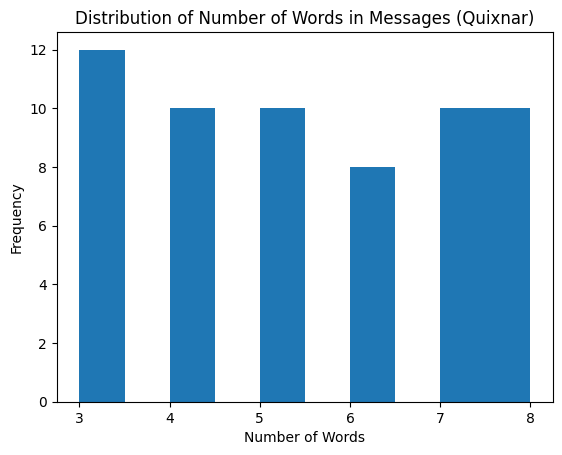

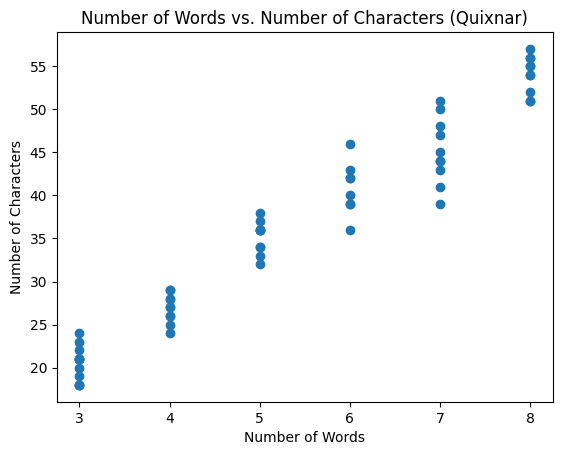

KeyError: 'rolling_hash'

In [ ]:
# Some plots of quixnar_data for data analysis
import matplotlib.pyplot as plt
# Histogram of num_words for Quixnar species
plt.hist(quixnar_data['num_words'], bins=10)
plt.title('Distribution of Number of Words in Messages (Quixnar)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of num_words vs. num_characters for Quixnar species
plt.scatter(quixnar_data['num_words'], quixnar_data['num_characters'])
plt.title('Number of Words vs. Number of Characters (Quixnar)')
plt.xlabel('Number of Words')
plt.ylabel('Number of Characters')
plt.show()

# Box plot of rolling_hash for Quixnar species
plt.boxplot(quixnar_data['rolling_hash'])
plt.title('Distribution of Rolling Hash Values (Quixnar)')
plt.ylabel('Rolling Hash Value')
plt.show()

# Bar chart of tail values for Quixnar species
tail_counts = quixnar_data['tail'].value_counts()
plt.bar(tail_counts.index, tail_counts.values)
plt.title('Distribution of Tail Values (Quixnar)')
plt.xlabel('Tail Value (0 or 1)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


data2 = pd.read_csv('data.csv')

# Preprocess the data
X = data[['message', 'tail', 'fingers']]
y = data['species']

# Encode the target variable 'species'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tokenize the 'message' column
tokenizer = Tokenizer(num_words=5000)  # num_words can be adjusted
tokenizer.fit_on_texts(X['message'])
X_message_sequences = tokenizer.texts_to_sequences(X['message'])

# Pad sequences to a fixed length
max_sequence_length = 100  
X_message_padded = pad_sequences(X_message_sequences, maxlen=max_sequence_length)

# Create input features by combining 'message', 'tail', and 'fingers'
X_features = pd.concat([pd.DataFrame(X_message_padded), X[['tail', 'fingers']]], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Embedding(5000, 128, input_length=max_sequence_length))  # Embedding layer for text
model.add(LSTM(128))  # LSTM layer for sequence processing
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer with softmax for multi-class classification

# Compiling
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Making predictions
predictions = model.predict(X_test)
predicted_species = label_encoder.inverse_transform(predictions.argmax(axis=1))

print(predicted_species[:10])


Epoch 1/10


<ipython-input-14-330f5cfc263c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tail'] = X['tail'].apply(lambda x: 1 if x == 'yes' else 0)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - accuracy: 0.1140 - loss: 2.2969 - val_accuracy: 0.2900 - val_loss: 2.2670
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.3508 - loss: 2.2398 - val_accuracy: 0.3200 - val_loss: 2.1750
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 313ms/step - accuracy: 0.3601 - loss: 2.0451 - val_accuracy: 0.5200 - val_loss: 1.8915
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 293ms/step - accuracy: 0.5827 - loss: 1.7481 - val_accuracy: 0.5000 - val_loss: 1.3629
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - accuracy: 0.5589 - loss: 1.1665 - val_accuracy: 0.5600 - val_loss: 1.1202
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 222ms/step - accuracy: 0.6357 - loss: 0.9577 - val_accuracy: 0.6300 - val_loss: 0.8855
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 277ms/step - accuracy: 0.7156 - loss: 0.7195 - val_accuracy: 0.6700 - val_loss: 0.7088
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 224ms/step - accuracy: 0.7706 - loss: 0.6097 - val_accuracy: 0.6900 - val_

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming 'data.csv' is in the current working directory
data = pd.read_csv('data.csv')

# Preprocessing
X = data[['message', 'tail', 'fingers']]
y = data['species']

# Add a new feature: number of characters in the 'message' column
X['message_length'] = X['message'].apply(len)

# Encode the target variable 'species'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tokenize the 'message' column
tokenizer = Tokenizer(num_words=5000)  # Adjust num_words as needed
tokenizer.fit_on_texts(X['message'])
X_message_sequences = tokenizer.texts_to_sequences(X['message'])

# Pad sequences to a fixed length (maximum 6 words, as specified)
max_sequence_length = 6
X_message_padded = pad_sequences(X_message_sequences, maxlen=max_sequence_length)

# Create input features by combining 'message', 'tail', 'fingers', and 'message_length'
X_features = pd.concat([pd.DataFrame(X_message_padded), X[['tail', 'fingers', 'message_length']]], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Build the neural network model
model = Sequential()
model.add(Embedding(5000, 64, input_length=max_sequence_length))  # Embedding layer for text
model.add(LSTM(64))  # LSTM layer for sequence processing
model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer with softmax for multi-class classification

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=9, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

# Make predictions
predictions = model.predict(X_test)
predicted_species = label_encoder.inverse_transform(predictions.argmax(axis=1))

# Print some predictions
print(predicted_species[:10])


Epoch 1/9


<ipython-input-25-a3e9c161ec5b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tail'] = X['tail'].apply(lambda x: 1 if x == 'yes' else 0)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.1405 - loss: 2.2989 - val_accuracy: 0.3100 - val_loss: 2.2829
Epoch 2/9
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4561 - loss: 2.2669 - val_accuracy: 0.4600 - val_loss: 2.2286
Epoch 3/9
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4822 - loss: 2.1745 - val_accuracy: 0.4100 - val_loss: 2.0073
Epoch 4/9
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3960 - loss: 1.8269 - val_accuracy: 0.4000 - val_loss: 1.4537
Epoch 5/9
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4958 - loss: 1.3338 - val_accuracy: 0.5600 - val_loss: 1.0931
Epoch 6/9
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6091 - loss: 0.9985 - val_accuracy: 0.6200 - val_loss: 0.8976
Epoch 7/9
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6802 - loss: 0.7883 - val_accuracy: 0.6200 - val_loss: 0.7761
Epoch 8/9
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7204 - loss: 0.6418 - val_accuracy: 0.6500 - val_loss: 0.7130
Epoch 9/9

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D, Bidirectional, GRU, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load data
data = pd.read_csv('data.csv')

# Preprocess the data
X = data[['message', 'tail', 'fingers']]
y = data['species']

# Encode the target variable 'species'
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Tokenize the 'message' column
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X['message'])
X_message_sequences = tokenizer.texts_to_sequences(X['message'])

# Pad sequences to a fixed length
max_sequence_length = 100
X_message_padded = pad_sequences(X_message_sequences, maxlen=max_sequence_length)

# Create input features by combining 'message', 'tail', and 'fingers'
X_features = pd.concat([pd.DataFrame(X_message_padded), X[['tail', 'fingers']]], axis=1)
accuracies = []
for i in range(10):
  # Split the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2)

  # Model 1: LSTM
  # model = Sequential()
  # model.add(Embedding(5000, 128, input_length=max_sequence_length))  # Embedding layer for text
  # model.add(LSTM(128))  # LSTM layer for sequence processing
  # model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer with softmax for multi-class classification

  # Model 2: Bidirectional LSTM 
  # model = Sequential()
  # model.add(Embedding(5000, 128, input_length=max_sequence_length))  # Embedding layer for text
  # model.add(SpatialDropout1D(0.3))
  # model.add(Bidirectional(LSTM(128)))  # Bidirectional LSTM
  # model.add(Dropout(0.3))
  # model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer

  # Model 3: GRU (Uncomment to use)
  model = Sequential()
  model.add(Embedding(5000, 95, input_length=max_sequence_length))  # Embedding layer for text
  model.add(GRU(95,activation='tanh',dropout=0.25))  # GRU layer
  #model.add(Bidirectional(GRU(80, dropout=0.5, recurrent_dropout=0.5)))
  #model.add(Dropout(0.5))  # Additional dropout
  model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer

  # Model 4: CNN 
  # model = Sequential()
  # model.add(Embedding(5000, 128, input_length=max_sequence_length))  # Embedding layer for text
  # model.add(Conv1D(128, 5, activation='relu'))  # CNN layer
  # model.add(GlobalMaxPooling1D())  # Global max pooling layer
  # model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer

  # Model 5: Hybrid CNN-LSTM 
  # model = Sequential()
  # model.add(Embedding(5000, 128, input_length=max_sequence_length))  # Embedding layer for text
  # model.add(Conv1D(128, 5, activation='relu'))  # CNN layer
  # model.add(GlobalMaxPooling1D())  # Global max pooling layer
  # model.add(LSTM(128))  # LSTM layer
  # model.add(Dense(len(label_encoder.classes_), activation='softmax'))  # Output layer


  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  # Training
  model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

  # Evaluation
  loss, accuracy = model.evaluate(X_test, y_test)
  print('Test Loss:', loss)
  print('Test Accuracy:', accuracy)
  accuracies.append(accuracy)

# Making Predictions
predictions = model.predict(X_test)
predicted_species = label_encoder.inverse_transform(predictions.argmax(axis=1))

print(predicted_species[:10])
print("Average", sum(accuracies)/len(accuracies))


Epoch 1/10


<ipython-input-10-28c9519a575c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tail'] = X['tail'].apply(lambda x: 1 if x == 'yes' else 0)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.1380 - loss: 2.2962 - val_accuracy: 0.1600 - val_loss: 2.2680
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2628 - loss: 2.2479 - val_accuracy: 0.2300 - val_loss: 2.2069
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3927 - loss: 2.1454 - val_accuracy: 0.3900 - val_loss: 2.0049
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4643 - loss: 1.8457 - val_accuracy: 0.5000 - val_loss: 1.5584
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5566 - loss: 1.2929 - val_accuracy: 0.7000 - val_loss: 0.9957
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7909 - loss: 0.7797 - val_accuracy: 0.8300 - val_loss: 0.6821
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8469 - loss: 0.5334 - val_accuracy: 0.8600 - val_loss: 0.5053
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8319 - loss: 0.4298 - val_accuracy: 0.8400 - val_loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.1958 - loss: 2.2929 - val_accuracy: 0.2600 - val_loss: 2.2697
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3348 - loss: 2.2308 - val_accuracy: 0.2400 - val_loss: 2.2018
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2455 - loss: 2.1215 - val_accuracy: 0.2800 - val_loss: 2.0347
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4411 - loss: 1.7985 - val_accuracy: 0.6300 - val_loss: 1.5932
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7041 - loss: 1.3609 - val_accuracy: 0.6700 - val_loss: 1.1362
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7936 - loss: 0.8776 - val_accuracy: 0.8200 - val_loss: 0.8087
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8720 - loss: 0.5145 - val_accuracy: 0.7700 - val_loss: 0.6328
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8924 - loss: 0.3914 - val_accuracy: 0.8100 - val_loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.1562 - loss: 2.2941 - val_accuracy: 0.2900 - val_loss: 2.2699
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3568 - loss: 2.2434 - val_accuracy: 0.2800 - val_loss: 2.2080
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4158 - loss: 2.1435 - val_accuracy: 0.3800 - val_loss: 2.0391
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4989 - loss: 1.8864 - val_accuracy: 0.5400 - val_loss: 1.7312
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7014 - loss: 1.4790 - val_accuracy: 0.6300 - val_loss: 1.3072
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7671 - loss: 1.0057 - val_accuracy: 0.7500 - val_loss: 0.9036
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8484 - loss: 0.6299 - val_accuracy: 0.8500 - val_loss: 0.5987
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8510 - loss: 0.4545 - val_accuracy: 0.8300 - val_loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.1436 - loss: 2.2970 - val_accuracy: 0.2000 - val_loss: 2.2762
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3525 - loss: 2.2445 - val_accuracy: 0.2700 - val_loss: 2.2137
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4184 - loss: 2.1353 - val_accuracy: 0.4300 - val_loss: 1.9814
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5130 - loss: 1.8279 - val_accuracy: 0.5700 - val_loss: 1.5553
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6688 - loss: 1.3015 - val_accuracy: 0.6600 - val_loss: 0.9811
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7459 - loss: 0.7850 - val_accuracy: 0.8200 - val_loss: 0.6821
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8297 - loss: 0.5484 - val_accuracy: 0.8100 - val_loss: 0.5186
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8532 - loss: 0.4254 - val_accuracy: 0.8600 - val_loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.1400 - loss: 2.2932 - val_accuracy: 0.2700 - val_loss: 2.2636
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3578 - loss: 2.2240 - val_accuracy: 0.3200 - val_loss: 2.1944
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3979 - loss: 2.0963 - val_accuracy: 0.4100 - val_loss: 1.9914
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5419 - loss: 1.7723 - val_accuracy: 0.6500 - val_loss: 1.5895
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7188 - loss: 1.3652 - val_accuracy: 0.7700 - val_loss: 1.0554
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8274 - loss: 0.7736 - val_accuracy: 0.8200 - val_loss: 0.7258
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8616 - loss: 0.5142 - val_accuracy: 0.8700 - val_loss: 0.5186
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8454 - loss: 0.4522 - val_accuracy: 0.8300 - val_loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.1771 - loss: 2.2936 - val_accuracy: 0.3200 - val_loss: 2.2700
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3725 - loss: 2.2288 - val_accuracy: 0.2300 - val_loss: 2.2225
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4183 - loss: 2.1284 - val_accuracy: 0.3800 - val_loss: 2.0856
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5353 - loss: 1.8746 - val_accuracy: 0.5300 - val_loss: 1.6765
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6274 - loss: 1.3915 - val_accuracy: 0.6400 - val_loss: 1.2093
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7375 - loss: 0.8992 - val_accuracy: 0.8000 - val_loss: 0.7294
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8743 - loss: 0.4869 - val_accuracy: 0.8600 - val_loss: 0.5171
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8610 - loss: 0.4052 - val_accuracy: 0.8600 - val_loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.1597 - loss: 2.2939 - val_accuracy: 0.3200 - val_loss: 2.2574
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3276 - loss: 2.2358 - val_accuracy: 0.3500 - val_loss: 2.1837
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4143 - loss: 2.1231 - val_accuracy: 0.4800 - val_loss: 1.9781
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5500 - loss: 1.7977 - val_accuracy: 0.6200 - val_loss: 1.5454
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7150 - loss: 1.2821 - val_accuracy: 0.6900 - val_loss: 1.0257
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7610 - loss: 0.8019 - val_accuracy: 0.6900 - val_loss: 0.8201
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8121 - loss: 0.5928 - val_accuracy: 0.8100 - val_loss: 0.6373
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8606 - loss: 0.4777 - val_accuracy: 0.8700 - val_loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.1080 - loss: 2.2942 - val_accuracy: 0.1900 - val_loss: 2.2758
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3869 - loss: 2.2373 - val_accuracy: 0.2700 - val_loss: 2.2191
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4688 - loss: 2.1237 - val_accuracy: 0.3600 - val_loss: 2.0219
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5105 - loss: 1.7940 - val_accuracy: 0.3900 - val_loss: 1.6111
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6292 - loss: 1.3068 - val_accuracy: 0.6700 - val_loss: 1.1113
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7697 - loss: 0.8549 - val_accuracy: 0.7900 - val_loss: 0.8044
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8498 - loss: 0.5962 - val_accuracy: 0.8300 - val_loss: 0.6088
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8634 - loss: 0.4249 - val_accuracy: 0.8600 - val_loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.1395 - loss: 2.2985 - val_accuracy: 0.3800 - val_loss: 2.2675
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4209 - loss: 2.2495 - val_accuracy: 0.5200 - val_loss: 2.1869
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5259 - loss: 2.1382 - val_accuracy: 0.5400 - val_loss: 1.9716
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6164 - loss: 1.8484 - val_accuracy: 0.6600 - val_loss: 1.4802
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6920 - loss: 1.2517 - val_accuracy: 0.6700 - val_loss: 1.0171
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7881 - loss: 0.8016 - val_accuracy: 0.7900 - val_loss: 0.6831
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8634 - loss: 0.5005 - val_accuracy: 0.8400 - val_loss: 0.5621
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8773 - loss: 0.4349 - val_accuracy: 0.8400 - val_loss: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.1519 - loss: 2.2947 - val_accuracy: 0.2900 - val_loss: 2.2617
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3802 - loss: 2.2368 - val_accuracy: 0.3700 - val_loss: 2.1901
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4711 - loss: 2.1145 - val_accuracy: 0.3900 - val_loss: 1.9675
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5144 - loss: 1.7847 - val_accuracy: 0.5300 - val_loss: 1.5408
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6895 - loss: 1.3024 - val_accuracy: 0.6800 - val_loss: 1.0653
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7343 - loss: 0.8623 - val_accuracy: 0.7900 - val_loss: 0.8478
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8665 - loss: 0.5271 - val_accuracy: 0.7900 - val_loss: 0.7547
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8592 - loss: 0.4565 - val_accuracy: 0.7900 - val_loss: 0.

In [ ]:
import pandas as pd

test_data = pd.read_csv('test.csv')

# Preprocess the test data in the same way as the training data
X_test_new = test_data[['message', 'tail', 'fingers']]
X_test_new['tail'] = X_test_new['tail'].apply(lambda x: 1 if x == 'yes' else 0)

X_test_message_sequences = tokenizer.texts_to_sequences(X_test_new['message'])
X_test_message_padded = pad_sequences(X_test_message_sequences, maxlen=max_sequence_length)
X_test_features = pd.concat([pd.DataFrame(X_test_message_padded), X_test_new[['tail', 'fingers']]], axis=1)

# Make predictions using the trained model
predictions_new = model.predict(X_test_features)
predicted_species_new = label_encoder.inverse_transform(predictions_new.argmax(axis=1))

# Create a new DataFrame with the predictions
answer_data = pd.DataFrame({'species': predicted_species_new})

# Save the predictions to a new CSV file named 'answer.csv'
answer_data.to_csv('answer.csv', index=False)

print("Predictions saved to answer.csv")
